### Домашнее задание по визуализации

В домашнем задании будем работать с данными фильмов на IMDB. 

Для начала считаем данные и проигнорируем все строки, которые не распарсились (для простоты).

In [1]:
import pandas as pd
df = pd.read_csv('imdb.csv', error_bad_lines=False)
import seaborn as sns
%matplotlib inline
df.head(20)

C:\Users\valee\Documents\PythonStudy\public-2021-fall-master\public-2021-fall-master\venv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 66: expected 44 fields, saw 46\nSkipping line 111: expected 44 fields, saw 45\nSkipping line 198: expected 44 fields, saw 45\nSkipping line 222: expected 44 fields, saw 46\nSkipping line 278: expected 44 fields, saw 45\nSkipping line 396: expected 44 fields, saw 45\nSkipping line 403: expected 44 fields, saw 45\nSkipping line 421: expected 44 fields, saw 45\nSkipping line 437: expected 44 fields, saw 45\nSkipping line 462: expected 44 fields, saw 46\nSkipping line 491: expected 44 fields, saw 45\nSkipping line 515: expected 44 fields, saw 45\nSkipping line 529: expected 44 fields, saw 45\nSkipping line 530: expected 44 fields, saw 45\nSkipping line 558: expected 44 fiel

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
5,titles01/tt0022100,tt0022100,M (1931),m,http://www.imdb.com/title/tt0022100/,8.5,73726.0,7020.0,1931.0,video.movie,...,0,0,0,0,0,0,0,1,0,0
6,titles01/tt0025316,tt0025316,Es geschah in einer Nacht (1934),es geschah in einer nacht,http://www.imdb.com/title/tt0025316/,8.3,46503.0,6300.0,1934.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
7,titles01/tt0027977,tt0027977,Moderne Zeiten (1936),moderne zeiten,http://www.imdb.com/title/tt0027977/,8.6,90847.0,5220.0,1936.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
8,titles01/tt0031381,tt0031381,Vom Winde verweht (1939),vom winde verweht,http://www.imdb.com/title/tt0031381/,8.2,160414.0,14280.0,1939.0,video.movie,...,0,0,1,0,0,0,0,0,1,0
9,titles01/tt0031679,tt0031679,Mr. Smith geht nach Washington (1939),mr smith geht nach washington,http://www.imdb.com/title/tt0031679/,8.4,58169.0,7740.0,1939.0,video.movie,...,0,0,0,0,0,0,0,0,0,0


__Задача 1:__ С каким параметром больше всего коррелирует число побед?
Ответ на задачу - название колонки в dataframe, с которой больше всего коррелирует `nrOfWins`.
__Ответ:__ 'nrOfNominations'

In [2]:
useful_cols = ['imdbRating', 'ratingCount', 'duration', 'year', 'nrOfNominations', 'nrOfPhotos',
               "nrOfNewsArticles", "nrOfUserReviews", 'nrOfGenre']
df[useful_cols].head(10)

,imdbRating,ratingCount,duration,year,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre
0,8.4,40550.0,3240.0,1921.0,0,19,96,85,3
1,8.3,45319.0,5700.0,1925.0,1,35,110,122,3
2,8.4,81007.0,9180.0,1927.0,4,67,428,376,2
3,8.3,37521.0,6420.0,1926.0,1,53,123,219,3
4,8.7,70057.0,5220.0,1931.0,0,38,187,186,3
5,8.5,73726.0,7020.0,1931.0,0,28,4,254,3
6,8.3,46503.0,6300.0,1934.0,1,40,183,211,2
7,8.6,90847.0,5220.0,1936.0,1,44,27,180,2
8,8.2,160414.0,14280.0,1939.0,6,143,1263,653,3
9,8.4,58169.0,7740.0,1939.0,10,34,110,226,1


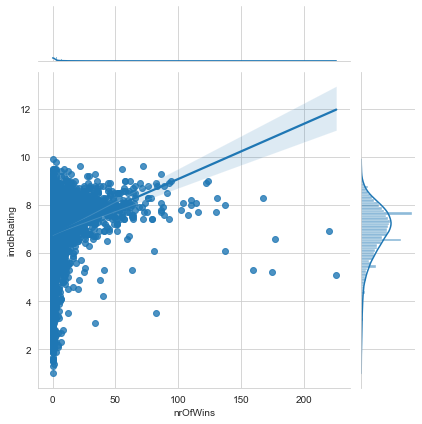

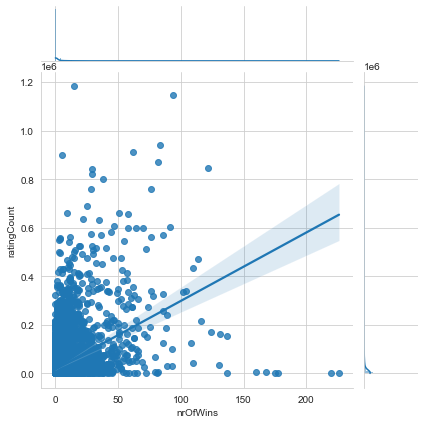

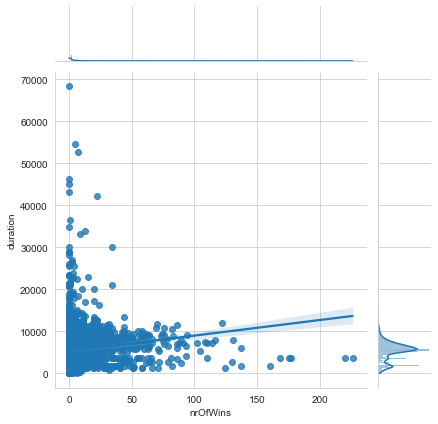

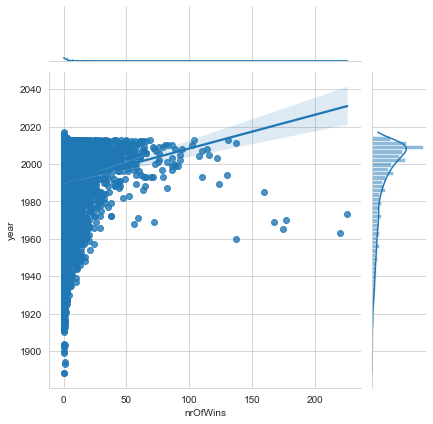

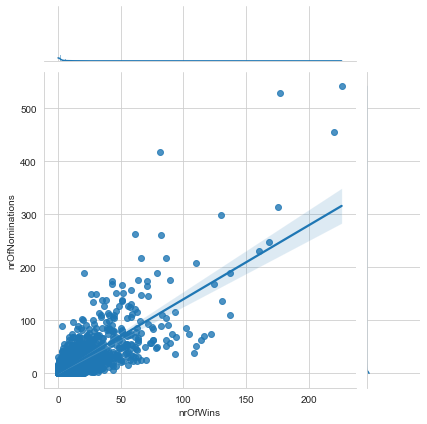

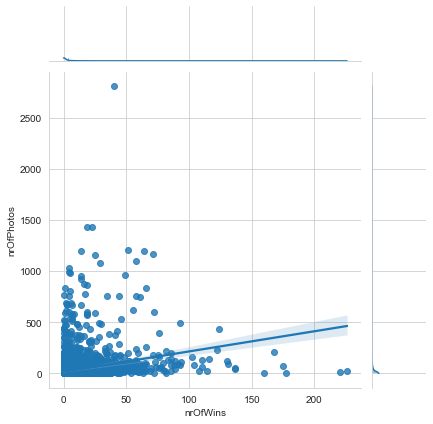

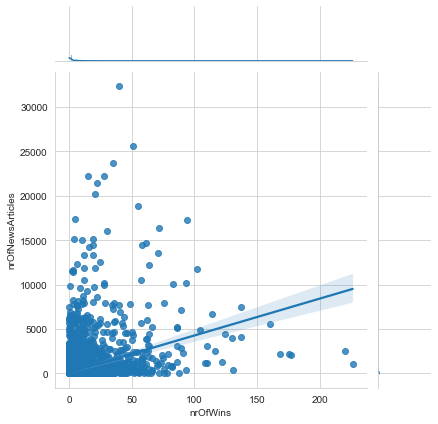

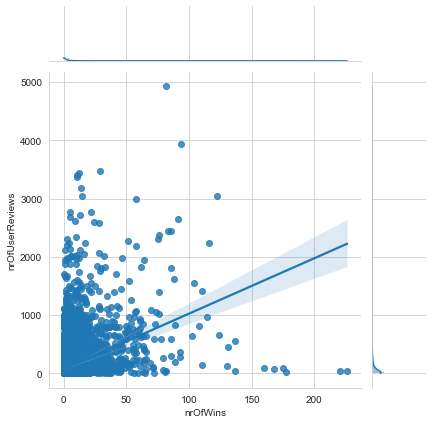

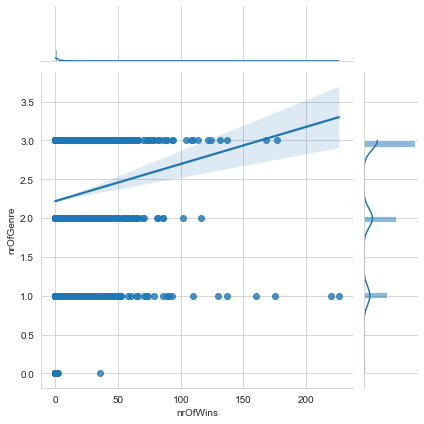

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

%config InlineBackend.figure_format = 'png'
for col in useful_cols:
    sns.jointplot(x='nrOfWins', y=col, data=df, kind='reg')
    plt.show()

__Задача 2:__ Посмотрите, как изменялась средняя оценка фильмов (рейтинг IMDB) с течением времени? В какое десятилетие была самая высокая средняя оценка. 

Ответ - tuple, где на первом месте тип тренда (слово 'ascending' или 'descending'), на втором - десятилие, например, если самые "хорошие" фильмы были в период 1950 - 1959, то 1950.

__Ответ:__ descending, 1920

In [4]:
df1 = df["year"] // 10 * 10
df_result = pd.concat((df1, df["imdbRating"]), axis=1)
df_result

,year,imdbRating
0,1920.0,8.4
1,1920.0,8.3
2,1920.0,8.4
3,1920.0,8.3
4,1930.0,8.7
...,...,...
14327,2000.0,7.7
14328,1950.0,7.3
14329,1990.0,7.0
14330,2000.0,NaN


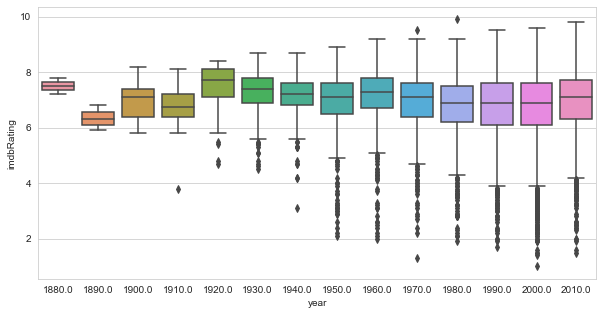

In [5]:
sns.boxplot(x="year", y="imdbRating", data=df_result)
plt.show()

<AxesSubplot:xlabel='year', ylabel='imdbRating'>

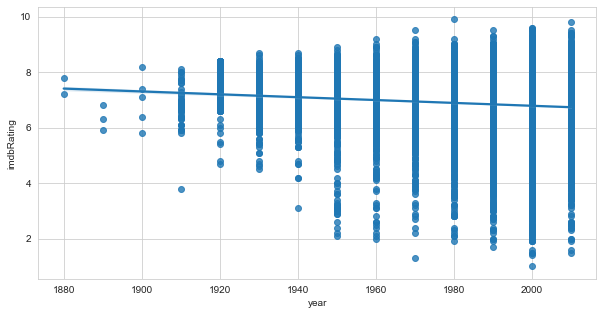

In [6]:
sns.regplot(x="year", y="imdbRating", data=df_result)


__Задача 3:__ Исследумем распределение оценок фильмов по жанрам (если фильм принадлежит нескольким жанрам, то будем учитывать его в каждом из них). Для простоты будем смотреть на топ-10 самых популярных жанров (по числу фильмов с этим жанром). В ответе укажите 2 жанра: жанр с самой высокой средней оценкой (по медиане) и с самой большой дисперсией (по IQR). Если у нескольких жанров одинаковый показатель, то стоит указать первый по алфавиту. 

Ответ - tuple с двумя жанрами

__Ответ:__  Высокая оценка - Documentary
            Высокая дисперсия - Family, (Horror)

In [7]:
df.iloc[:, list(range(16, 44))]

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14327,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14328,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14330,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
top_genres = df.iloc[:, list(range(16, 44))].sum().sort_values(ascending=False).head(10)

df[top_genres.index].head(20)

,Drama,Comedy,Action,Crime,Romance,Adventure,Thriller,Documentary,Family,Horror
0,1,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,1,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,0,0,1,0,0,1,0,0,0
6,0,1,0,0,1,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0
8,1,0,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0


In [9]:
genres = list(top_genres.index)
genres

['Drama',
 'Comedy',
 'Action',
 'Crime',
 'Romance',
 'Adventure',
 'Thriller',
 'Documentary',
 'Family',
 'Horror']

In [10]:
series_genre = []
series_rating = []
for i, row in df.iterrows():
    for genre in genres:
        if row[genre]:
            series_genre.append(genre)
            series_rating.append(row["imdbRating"])
df_new = pd.DataFrame({"Genre": pd.Series(series_genre),
                       "imdbRating": pd.Series(series_rating)})
df_new.head(30)

,Genre,imdbRating
0,Drama,8.4
1,Comedy,8.4
2,Family,8.4
3,Comedy,8.3
4,Adventure,8.3
5,Family,8.3
6,Drama,8.4
7,Comedy,8.3
8,Action,8.3
9,Adventure,8.3


<AxesSubplot:xlabel='Genre', ylabel='imdbRating'>

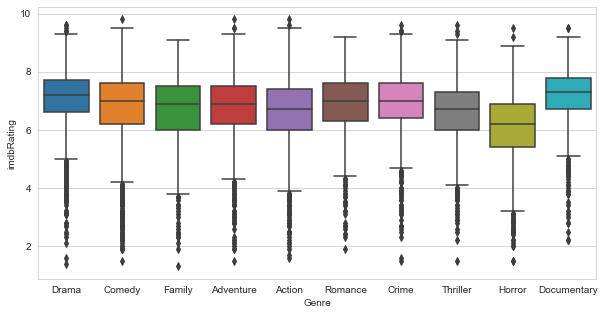

In [11]:
rcParams['figure.figsize'] = 10,5
sns.boxplot(x="Genre", y="imdbRating", data=df_new)


__Задача 4:__ Посмотрим на распределение фильмов по числу слов в названии. Какой график вы бы для этого построили и какова мода (самое частое значение) этого распределения?

Ответ - число слов, которое встречается в большем количестве фильмов.

__Ответ:__ 4

In [12]:
words_number = []
for i, value in df.wordsInTitle.items():
    words_number.append(len(str(value).split()))
words_number = pd.Series(words_number)

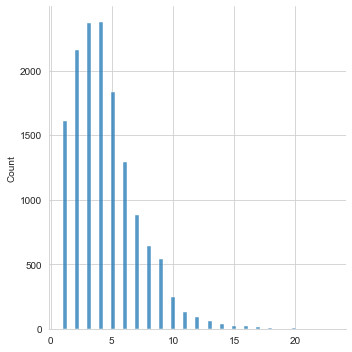

In [13]:
rcParams['figure.figsize'] = 15,5
sns.displot(words_number)

__Вопрос 5:__ Посмотрим на то, как менялась со временем продолжительность фильмов? Постройте график и ответьте на вопрос, в каком десятилетии доля коротких фильмов (короче часа) была выше всего? Рассматриваем период >= 1920 года.

Ответ - десятилетие, например, если больше всего коротких фильмов было в период 1950 - 1959, то 1950.

Ответ: 2010

In [14]:
df_short = []
df_long = []
for value in df.duration.values:
    if value < 3600:
        df_short.append(1)
        df_long.append(0)
    else:
        df_short.append(0)
        df_long.append(1)

In [15]:
df_decade = df["year"] // 10 * 10
df_short = pd.Series(df_short, name="Short")
df_long = pd.Series(df_long, name="Long")
df_short_result = pd.concat((df_decade, df_long, df_short), axis=1)
df_short_result = df_short_result[df_short_result["year"] > 1910]
df_short_result

,year,Long,Short
0,1920.0,0,1
1,1920.0,1,0
2,1920.0,1,0
3,1920.0,1,0
4,1930.0,1,0
...,...,...,...
14327,2000.0,0,1
14328,1950.0,1,0
14329,1990.0,1,0
14330,2000.0,1,0


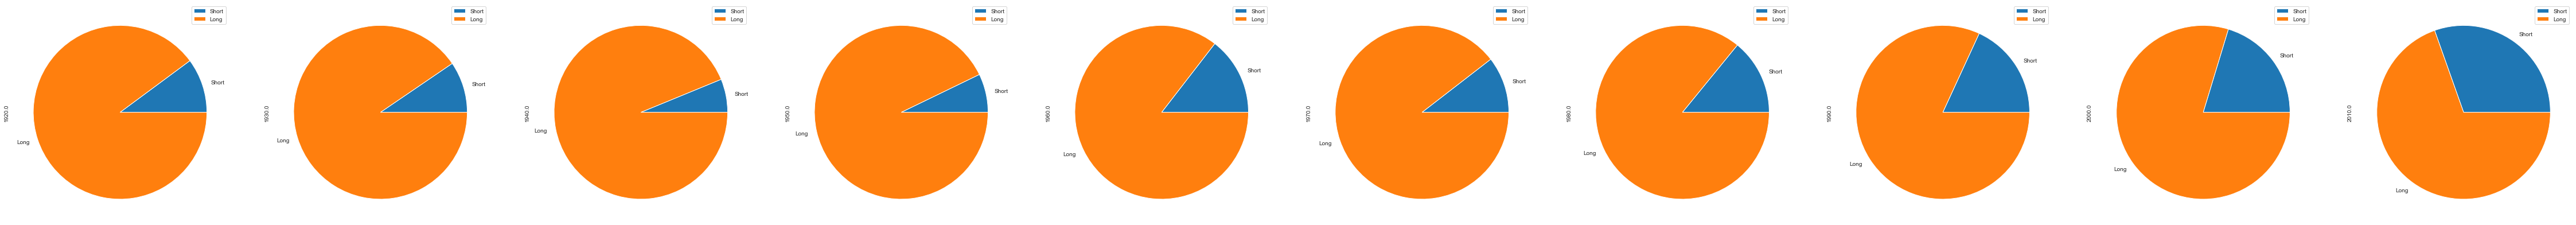

year,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,2000.0,2010.0
Short,16,33,30,48,119,101,194,428,940,739
Long,142,314,454,621,701,864,1183,1934,3686,1690


In [16]:
df_short_result1 = df_short_result[["Short", "Long"] + ["year"]].groupby("year").sum().transpose()

    
df_short_result1.plot.pie(subplots=True, figsize=(80, 80))
plt.show()
df_short_result1

__Вопрос 6:__ И последний вопрос: фильмам какого жанра пользователи оставляют больше всего рецензий? Подумайте о  том, по какой метрике лучше всего смотреть. В ответе укажите жанр.

__Ответ:__ "Drama"

<AxesSubplot:ylabel='Genre'>

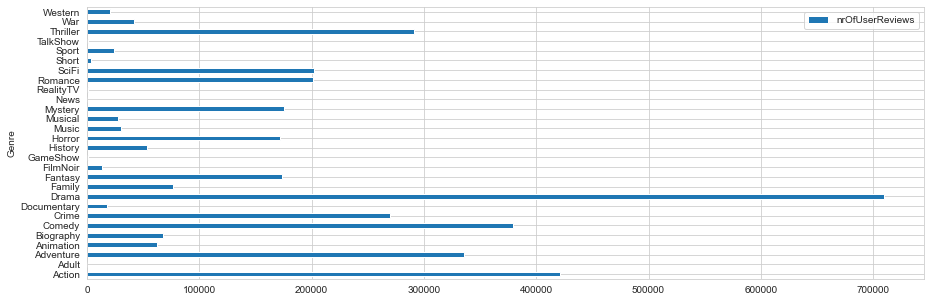

In [17]:
genres = list(df.iloc[:, list(range(16, 44))])
series_genre = []
series_reviews = []
for i, row in df.iterrows():
    for genre in genres:
        if row[genre]:
            series_genre.append(genre)
            series_reviews.append(row["nrOfUserReviews"])

df_new = pd.DataFrame({"Genre": pd.Series(series_genre),
                       "nrOfUserReviews": pd.Series(series_reviews)})

df_new = df_new.groupby("Genre").sum()
df_new.plot.barh()